In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [3]:
tech_list = ['MSFT', 'AMZN', 'AAPL', 'NVDA', 'TRP', 'HFC']

import yfinance as yf
import pandas_datareader.data as pdr

yf.pdr_override()

start_date = '04-10-2020'
end_date = '11-05-2020'

start = datetime.strptime(start_date, '%m-%d-%Y')
end = datetime.strptime(end_date, '%m-%d-%Y')
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = pdr.get_data_yahoo(stock, data_source='yahoo', start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
company_list = [MSFT, AMZN, AAPL, NVDA, TRP, HFC]
company_name = ["MICROSFT", "AMAZON", "APPLE", "NVIDIA", "TC ENERGY", "HOLLY FRONTIER"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2020-10-22,19.020000,20.010000,18.549999,19.930000,19.446299,2238400,HOLLY FRONTIER
2020-10-23,20.150000,20.889999,20.000000,20.389999,19.895134,1566900,HOLLY FRONTIER
2020-10-26,20.030001,20.139999,19.219999,19.379999,18.909647,1682700,HOLLY FRONTIER
2020-10-27,19.240000,19.350000,18.480000,18.570000,18.119305,3407400,HOLLY FRONTIER
2020-10-28,18.000000,18.110001,17.020000,17.230000,16.811827,3828000,HOLLY FRONTIER
2020-10-29,17.030001,17.850000,16.809999,17.790001,17.358236,2889300,HOLLY FRONTIER
2020-10-30,17.709999,18.549999,17.650000,18.510000,18.060760,4461000,HOLLY FRONTIER
2020-11-02,18.879999,19.500000,18.309999,19.219999,18.753529,2502900,HOLLY FRONTIER
2020-11-03,19.500000,19.610001,18.719999,19.049999,18.587656,2145800,HOLLY FRONTIER


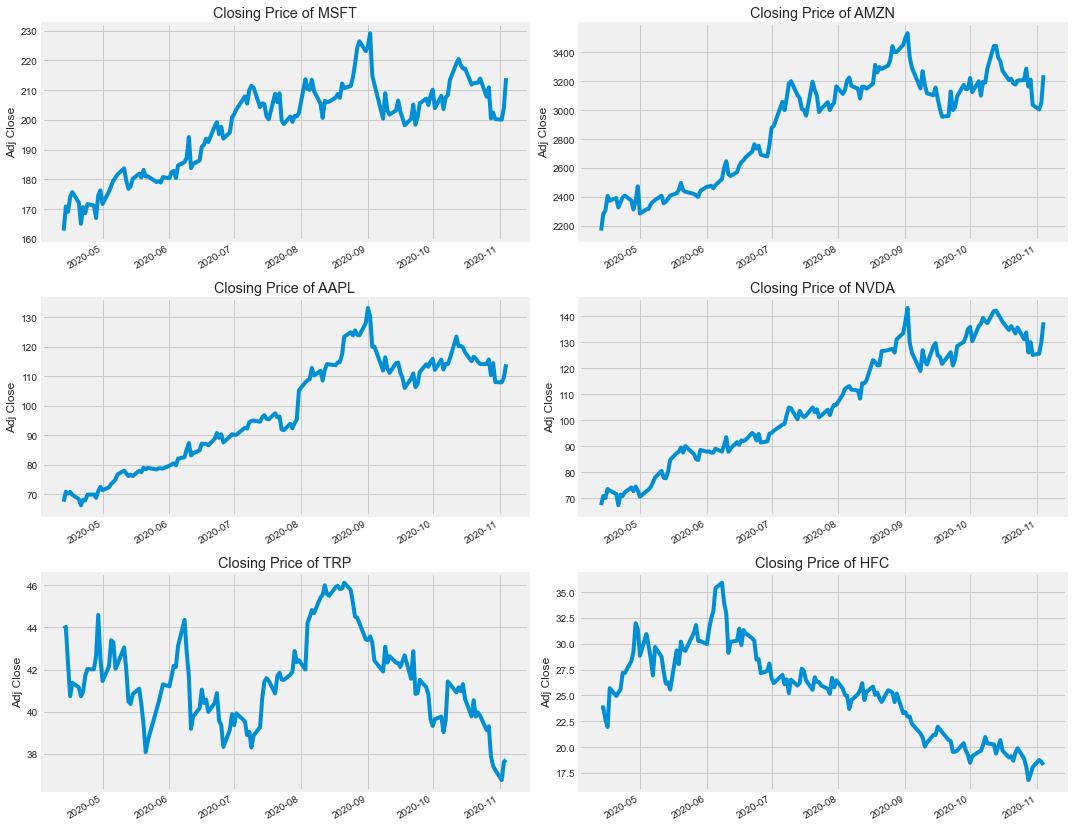

In [5]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

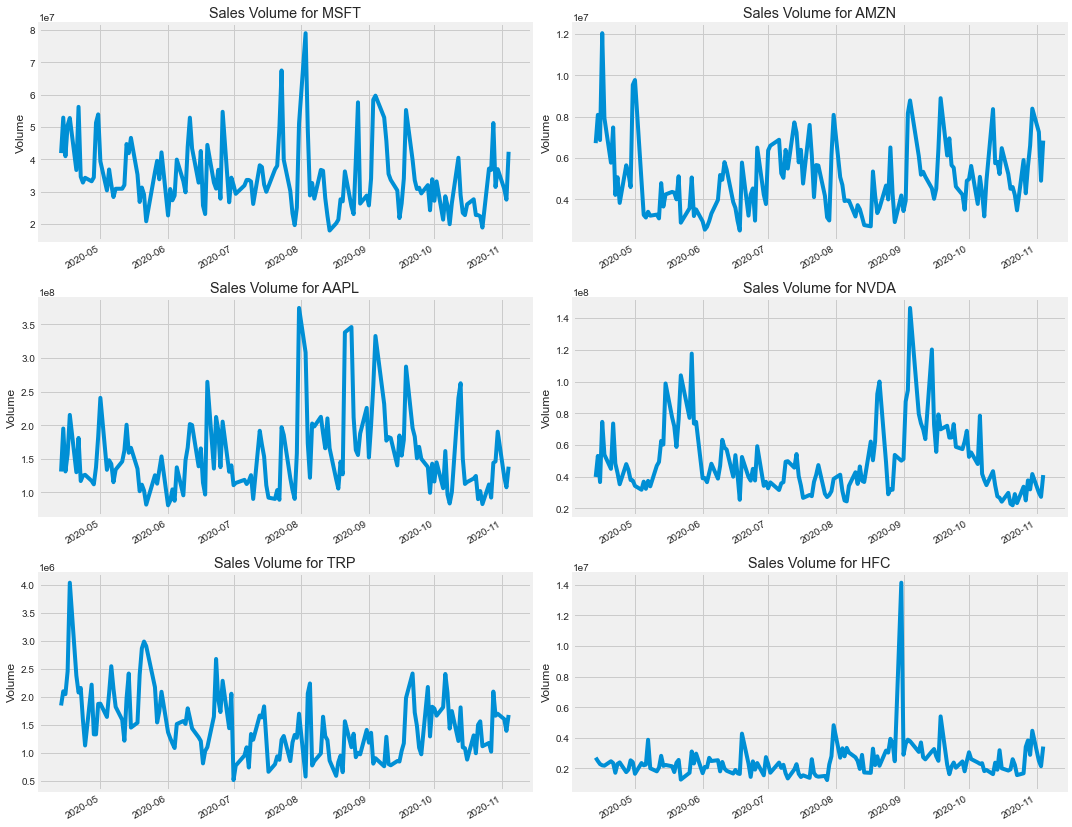

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [7]:
ma_day = [9, 21, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

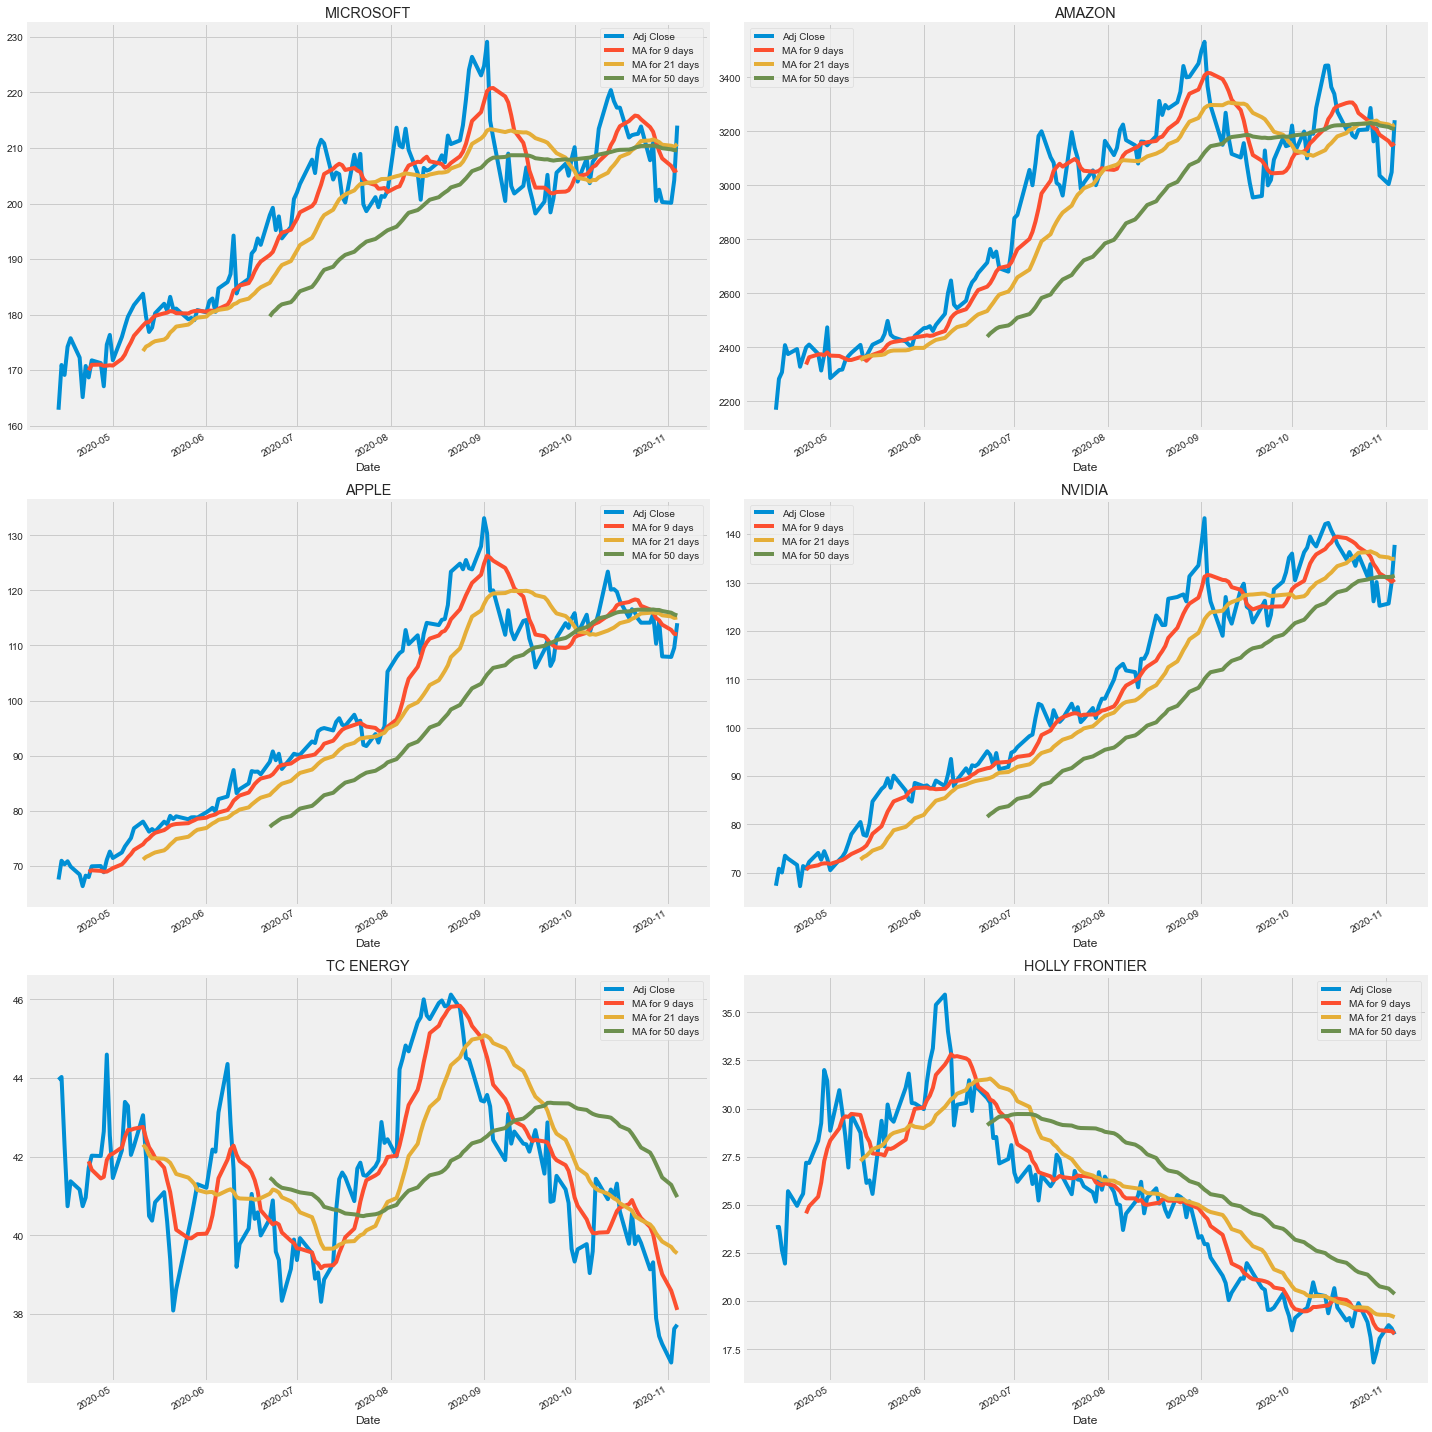

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(20)


MSFT[['Adj Close', 'MA for 9 days', 'MA for 21 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 9 days', 'MA for 21 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('AMAZON')

AAPL[['Adj Close', 'MA for 9 days', 'MA for 21 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title("APPLE")

NVDA[['Adj Close', 'MA for 9 days', 'MA for 21 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title("NVIDIA")

TRP[['Adj Close', 'MA for 9 days', 'MA for 21 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title("TC ENERGY")

HFC[['Adj Close', 'MA for 9 days', 'MA for 21 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title("HOLLY FRONTIER")

fig.tight_layout()

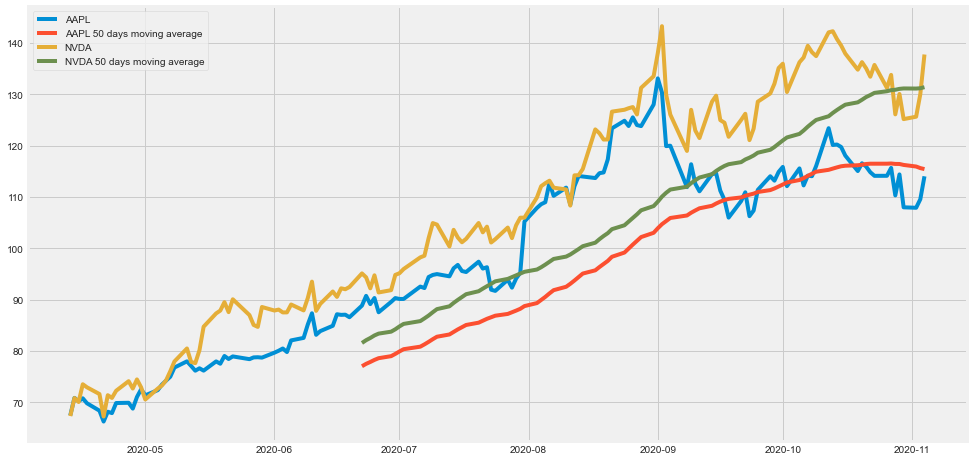

In [9]:
fig, axes = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.plot(AAPL['Adj Close'], label='AAPL')
plt.plot(AAPL['MA for 50 days'], label='AAPL 50 days moving average')
plt.plot(NVDA['Adj Close'], label='NVDA')
plt.plot(NVDA['MA for 50 days'], label='NVDA 50 days moving average')
plt.legend()

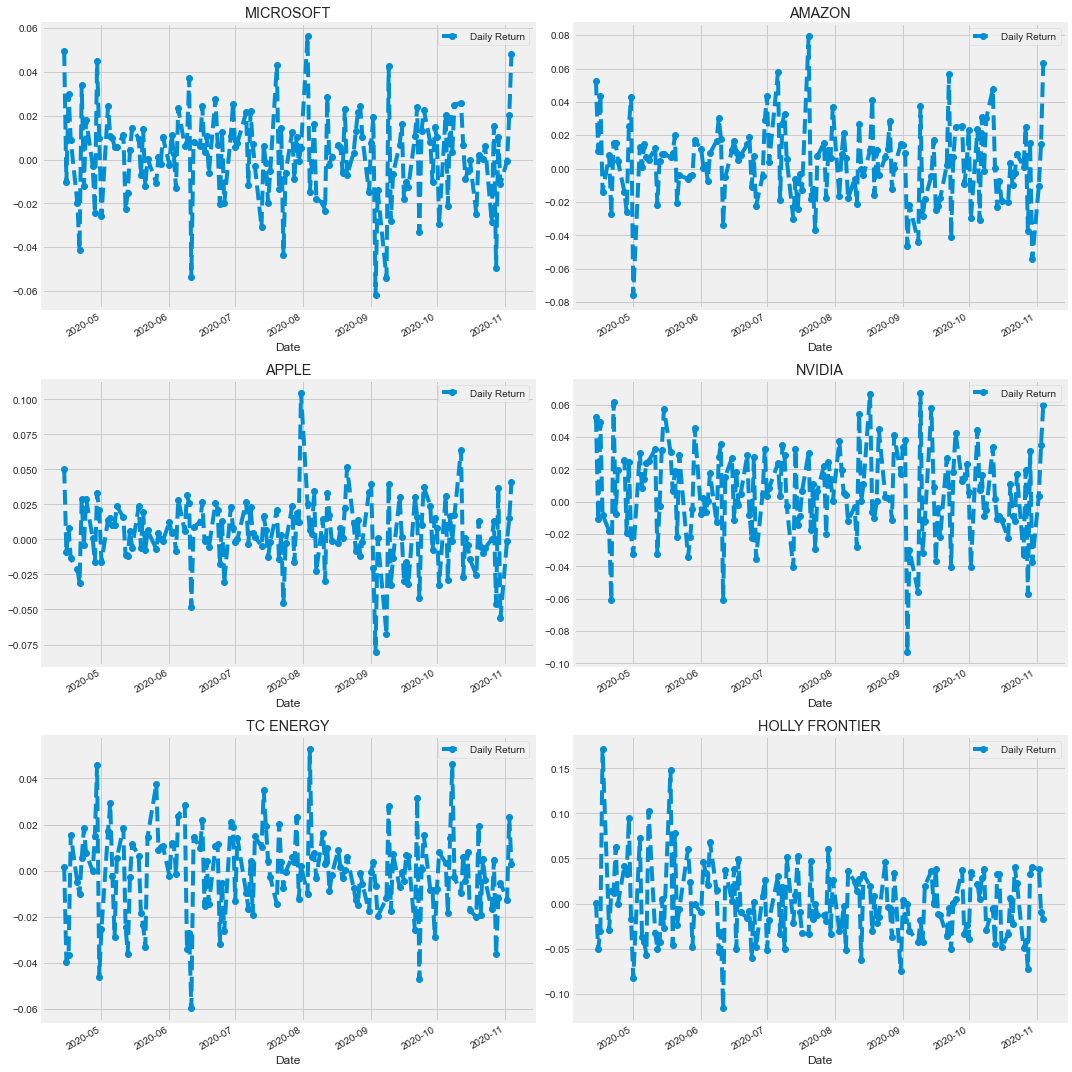

In [10]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)

MSFT['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('AMAZON')

AAPL['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('APPLE')

NVDA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('NVIDIA')

TRP['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('TC ENERGY')

HFC['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('HOLLY FRONTIER')


fig.tight_layout()

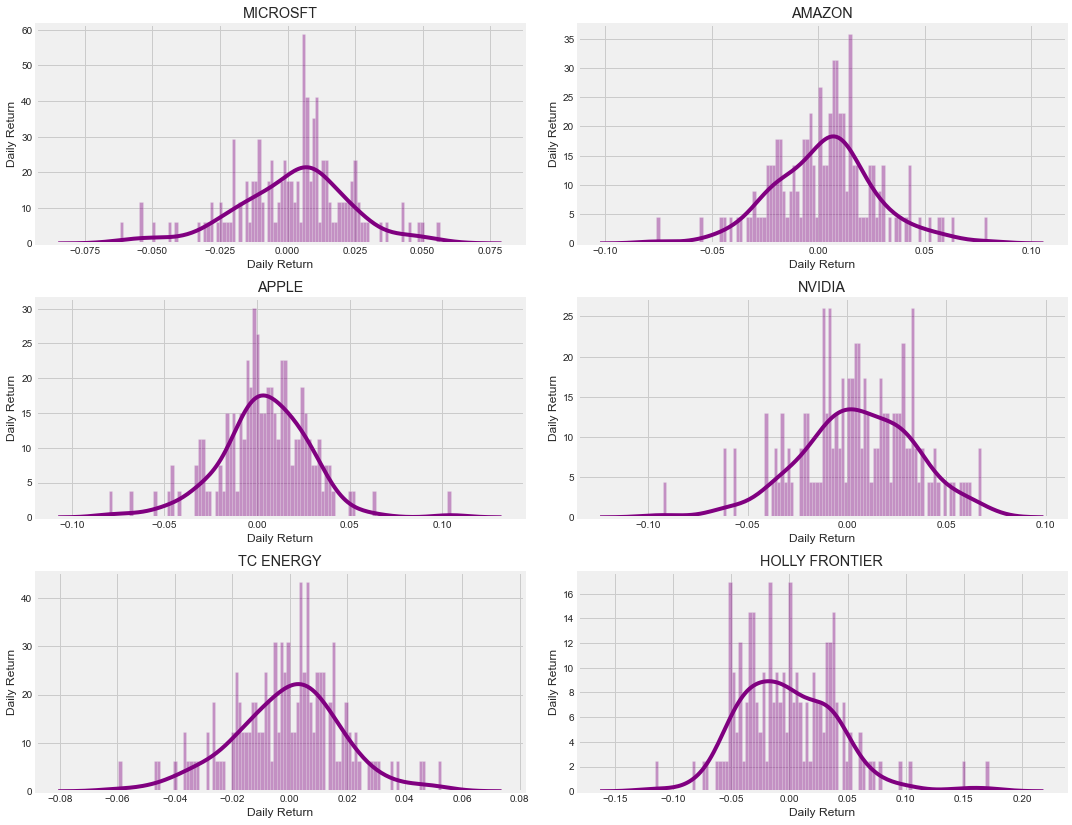

In [11]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(15, 15))

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

In [12]:
import yfinance as yf
import pandas_datareader.data as pdr

yf.pdr_override()

# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, data_source='yahoo', start=start, end=end)['Adj Close']
# Let's take a quick look
closing_df

[*********************100%***********************]  6 of 6 completed


,AAPL,AMZN,HFC,MSFT,NVDA,TRP
Date,,,,,,
2020-04-13,67.472382,2168.870117,23.834558,162.857224,67.332848,43.953297
2020-04-14,70.879959,2283.320068,23.853588,170.915970,70.851067,44.026703
2020-04-15,70.233017,2307.679932,22.645208,169.125122,70.075050,42.283253
2020-04-16,70.791069,2408.189941,21.950630,174.202454,73.533401,40.741676
2020-04-17,69.830513,2375.000000,25.708973,175.737427,72.939537,41.374828
...,...,...,...,...,...,...
2020-10-29,114.416031,3211.010010,17.358236,202.488098,130.087921,37.437538
2020-10-30,108.006683,3036.149902,18.060760,200.262650,125.193634,37.239357
2020-11-02,107.917381,3004.479980,18.753529,200.124176,125.660599,36.767494


In [13]:
stock_growth = closing_df.iloc[[0, -1]]
stock_growth = stock_growth.pct_change()*100
stock_growth = stock_growth.iloc[[-1]]
stock_growth.reset_index(drop=True, inplace=True)
stock_growth

,AAPL,AMZN,HFC,MSFT,NVDA,TRP
0,69.030557,49.440019,-23.323853,31.422407,104.627344,-14.158669


In [14]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,HFC,MSFT,NVDA,TRP
Date,,,,,,
2020-04-13,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-14,0.050503,0.052769,0.000798,0.049484,0.052251,0.001670
2020-04-15,-0.009127,0.010669,-0.050658,-0.010478,-0.010953,-0.039600
2020-04-16,0.007946,0.043555,-0.030672,0.030021,0.049352,-0.036458
2020-04-17,-0.013569,-0.013782,0.171218,0.008811,-0.008076,0.015541


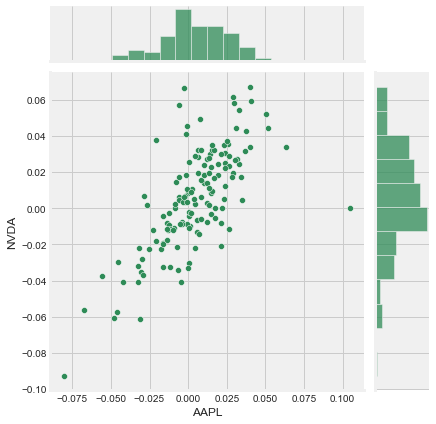

In [15]:
# Comparing AAL to itself should show a perfectly linear relationship
sns.jointplot('AAPL', 'NVDA', tech_rets, kind='scatter', color='seagreen')

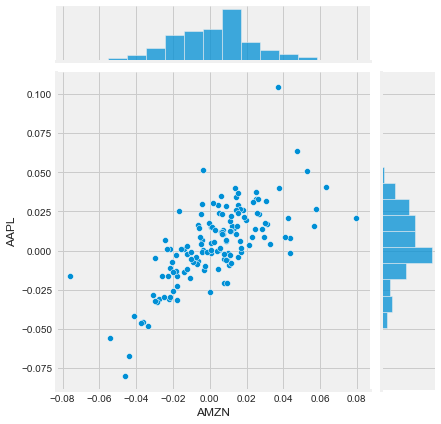

In [16]:
# We'll use joinplot to compare the daily returns of AAL and DAL
sns.jointplot('AMZN', 'AAPL', tech_rets, kind='scatter')

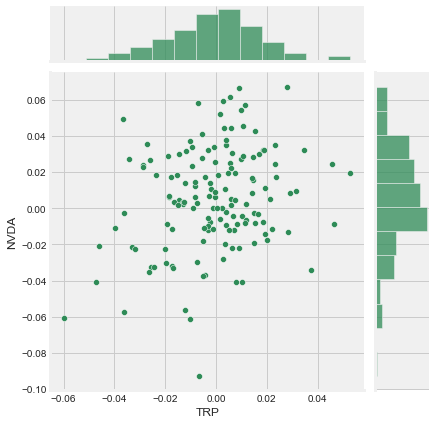

In [17]:
sns.jointplot('TRP', 'NVDA', tech_rets, kind='scatter', color='seagreen')

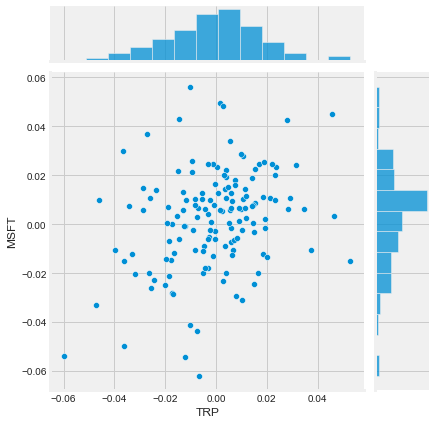

In [18]:
sns.jointplot('TRP', 'MSFT', tech_rets, kind='scatter')

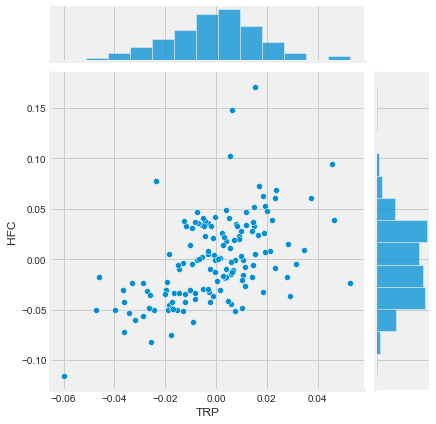

In [19]:
sns.jointplot('TRP', 'HFC', tech_rets, kind='scatter')

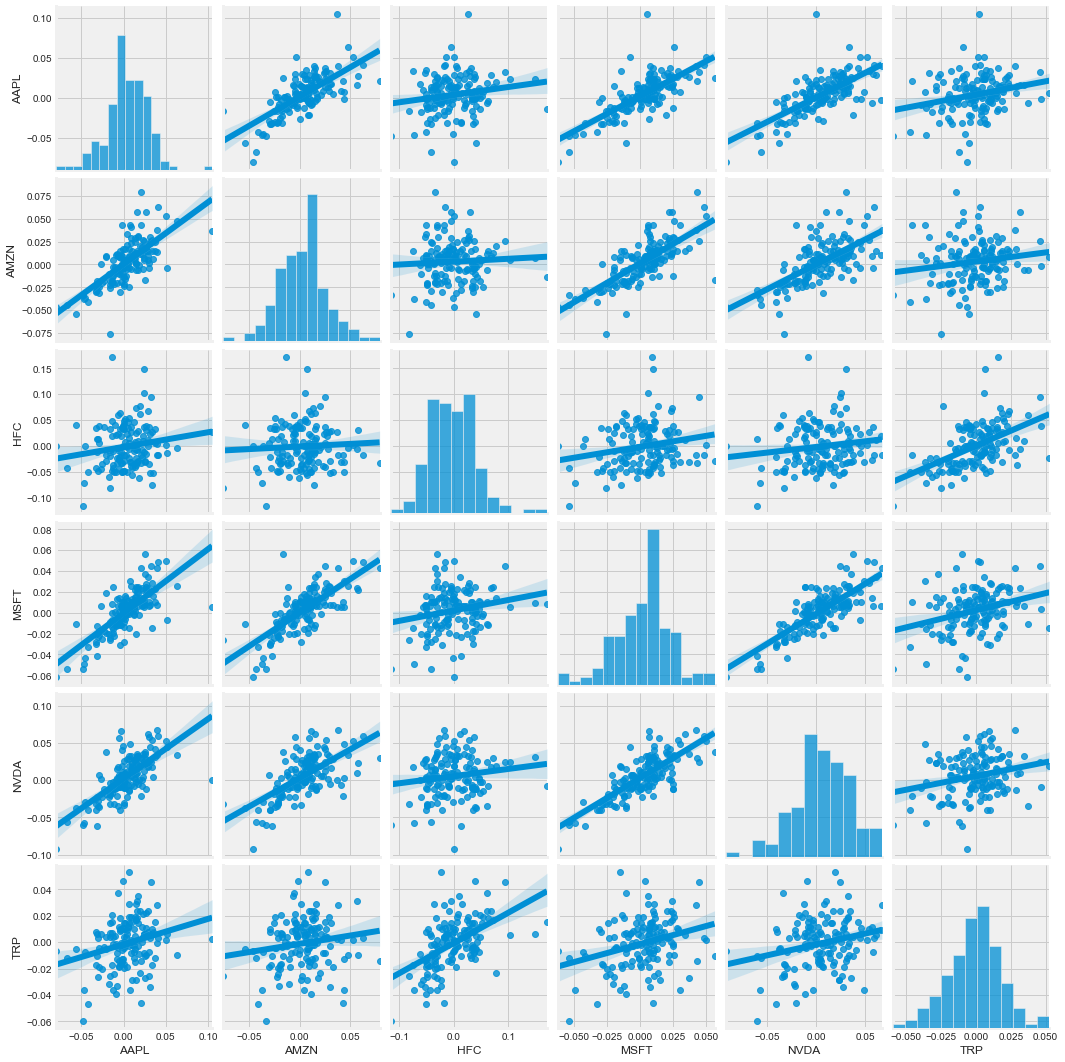

In [20]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

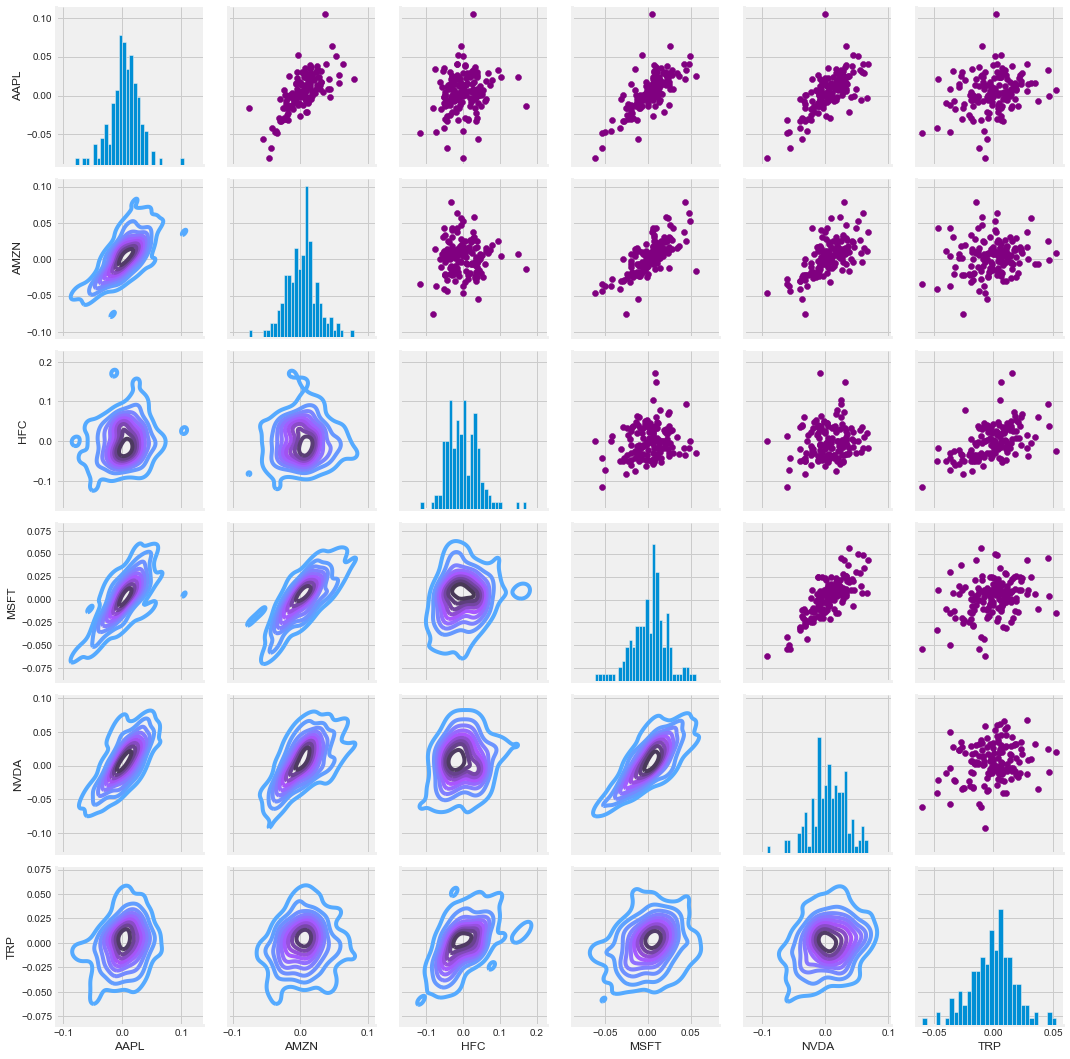

In [21]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

<AxesSubplot:>

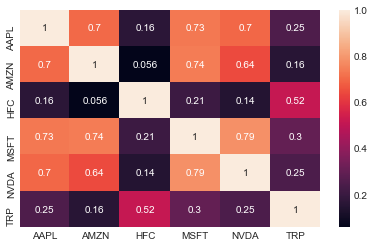

In [22]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='rocket')

<AxesSubplot:>

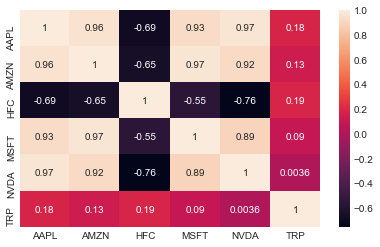

In [23]:
sns.heatmap(closing_df.corr(), annot=True, cmap='rocket')

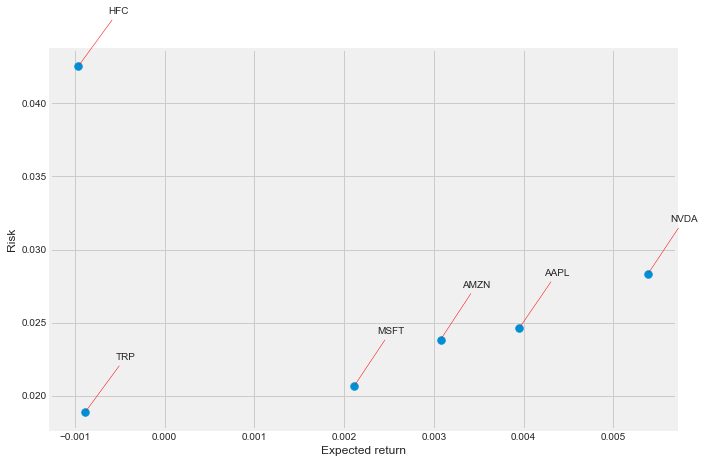

In [24]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='red'))